In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [6]:
x_train /= 255
x_test /= 255


In [8]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2068 - accuracy: 0.9384
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0838 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0569 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0436 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0352 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0273 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0249 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0213 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0710 - accuracy: 0.9844


[0.07101009041070938, 0.9843999743461609]

1/1 [==============================] - 0s 236ms/step
6


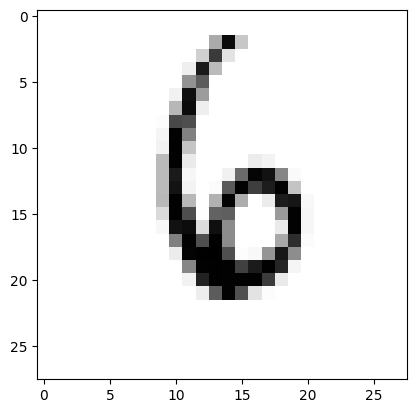

In [13]:
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')

pred = x_test[image_index].reshape(28, 28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))

print(pred.argmax())